In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
import pynance as pn


Historical Data of Apple:

In [8]:
# Load CSV file
df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (10998, 8)

First 5 rows:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0


In [4]:
# --- TA-Lib Indicators ---
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_Signal'], _ = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

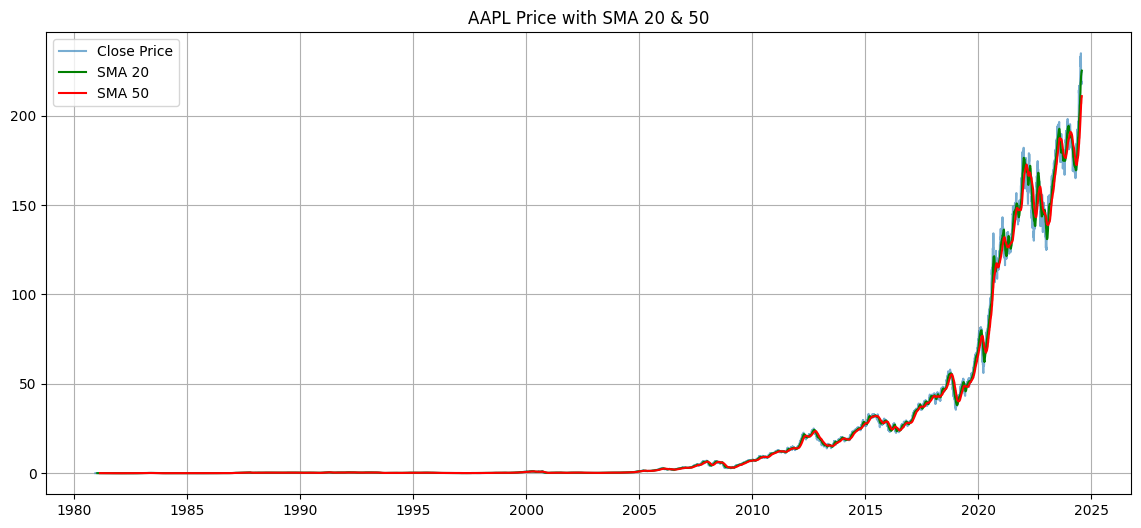

In [5]:
# --- Plot: Price with SMA ---
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['SMA_20'], label='SMA 20', color='green')
plt.plot(df['SMA_50'], label='SMA 50', color='red')
plt.title('AAPL Price with SMA 20 & 50')
plt.legend()
plt.grid(True)
plt.show()

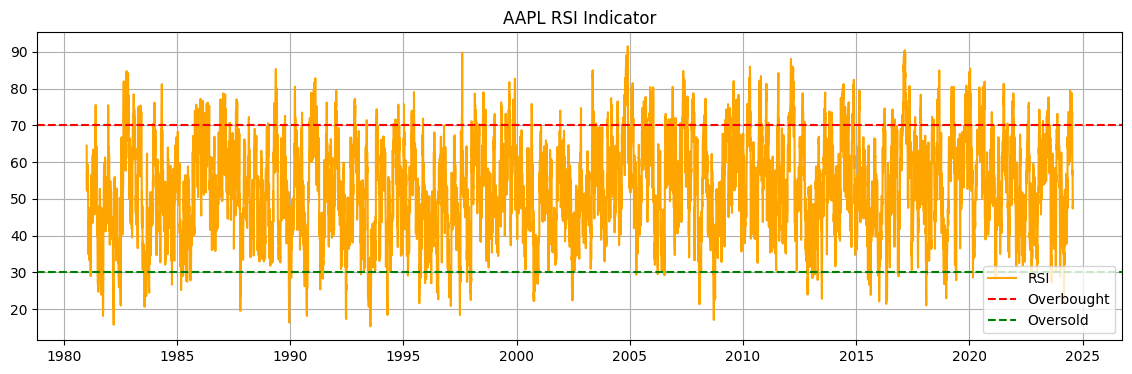

In [6]:
# --- Plot: RSI ---
plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('AAPL RSI Indicator')
plt.legend()
plt.grid(True)
plt.show()

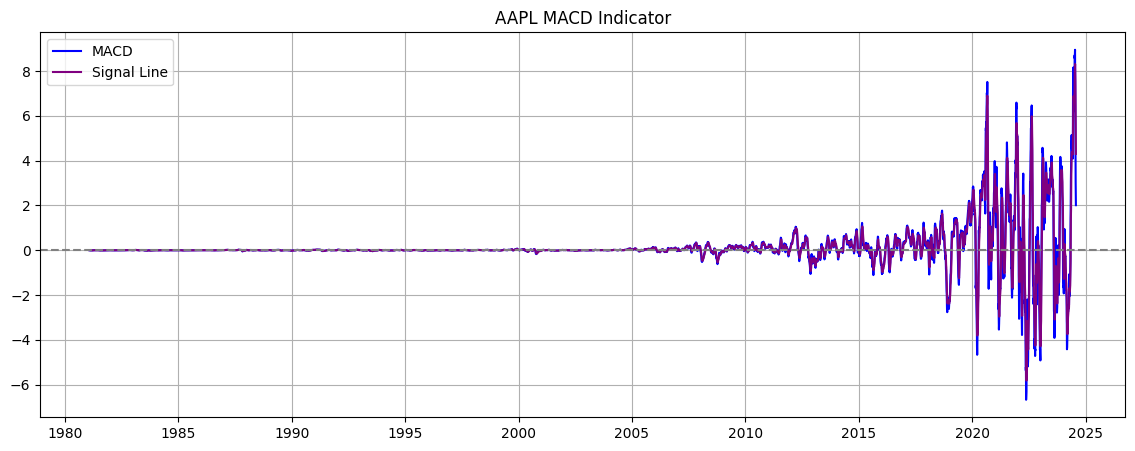

In [7]:
# --- Plot: MACD ---
plt.figure(figsize=(14, 5))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title('AAPL MACD Indicator')
plt.legend()
plt.grid(True)
plt.show()

Observations
1. SMA (Simple Moving Averages)
Golden Cross: When SMA 20 crosses above SMA 50 — suggests potential upward momentum.

Death Cross: When SMA 20 falls below SMA 50 — suggests bearish sentiment.

These crossovers are effective entry/exit signals for trend-following strategies.

2. RSI (Relative Strength Index)
Above 70: AAPL stock often entered overbought zones during rallies — often followed by corrections.

Below 30: RSI dipped into oversold territory during dips — providing potential buy opportunities.

RSI is ideal for momentum-based strategies.

3. MACD (Moving Average Convergence Divergence)
MACD > Signal Line: Bullish condition — buyers are in control.

MACD < Signal Line: Bearish signal — sellers are gaining strength.

MACD crossovers preceded significant price movements in several periods.

Historical Data of AMZ:

AMZN Stock Data

Sample Online Data from PyNance:
              Open      High     Low   Close    Volume
Date                                                  
2024-07-30  184.72  185.8600  179.38  181.71  39508574
2024-07-29  183.84  184.7500  182.38  183.20  33270123
2024-07-26  180.39  183.1900  180.24  182.50  29505964
2024-07-25  182.91  183.8958  176.80  179.85  44464163
2024-07-24  183.20  185.4500  180.41  180.83  41532360


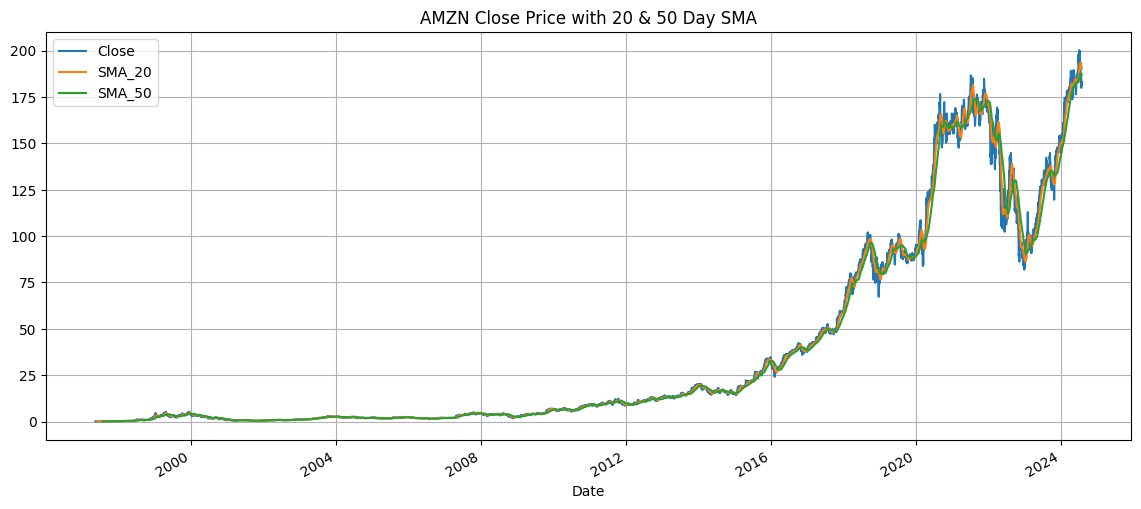

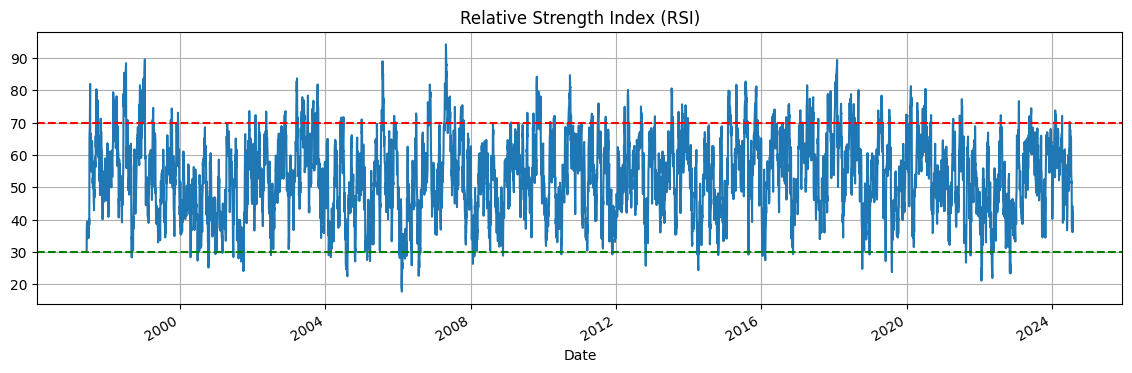

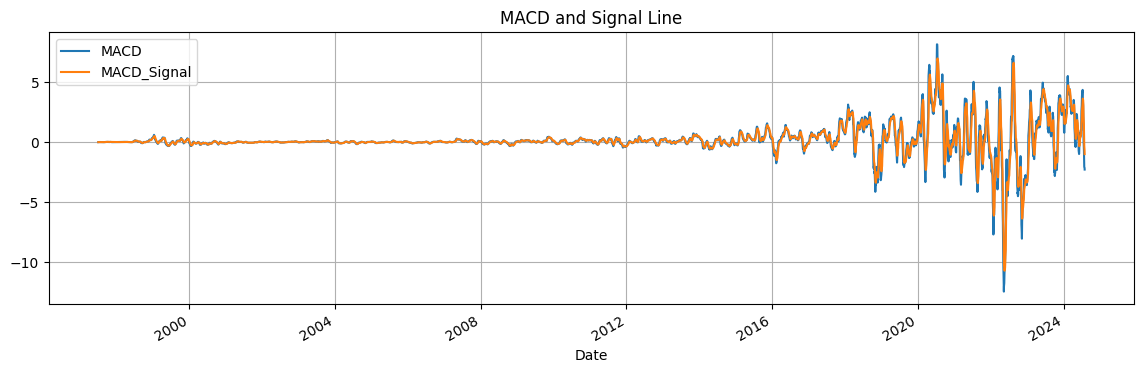

In [38]:
# ===== 1. Load and Prepare Data =====
df = pd.read_csv("../data/yfinance_data/AMZN_historical_data.csv", parse_dates=["Date"], index_col="Date")

# Ensure columns are numeric
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data
df.dropna(inplace=True)

# ===== 2. Apply Technical Indicators with TA-Lib =====
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df["SMA_50"] = talib.SMA(df["Close"], timeperiod=50)
df["RSI"] = talib.RSI(df["Close"], timeperiod=14)

macd, macdsignal, _ = talib.MACD(df["Close"])
df["MACD"] = macd
df["MACD_Signal"] = macdsignal

# ===== 3. (Optional) Use PyNance for Online Comparison =====
# We'll download current AMZN data for a similar time frame
online_df = pn.data.get("AMZN", start=str(df.index.min().date()), end=str(df.index.max().date()))
print("Sample Online Data from PyNance:")
print(online_df.head())

# ===== 4. Visualize the Data =====

# Plot 1: Close Price with SMAs
df[["Close", "SMA_20", "SMA_50"]].plot(figsize=(14, 6), title="AMZN Close Price with 20 & 50 Day SMA")
plt.grid(True)
plt.show()

# Plot 2: RSI
df["RSI"].plot(figsize=(14, 4), title="Relative Strength Index (RSI)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.grid(True)
plt.show()

# Plot 3: MACD
df[["MACD", "MACD_Signal"]].plot(figsize=(14, 4), title="MACD and Signal Line")
plt.grid(True)
plt.show()



Google Stock data Analysis

Sample Online Data from PyNance:
              Open    High      Low   Close    Volume
Date                                                 
2024-07-30  171.83  172.95  170.120  171.86  13681418
2024-07-29  170.50  172.16  169.720  171.13  13768931
2024-07-26  168.77  169.84  165.865  168.68  25150116
2024-07-25  174.25  175.20  169.050  169.16  28967880
2024-07-24  175.39  177.95  173.570  174.37  31250683


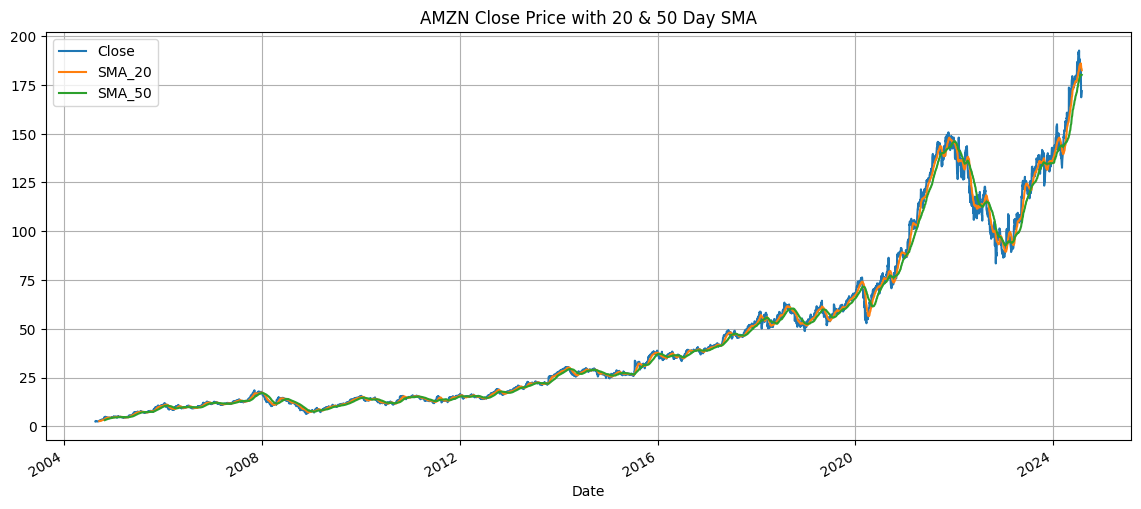

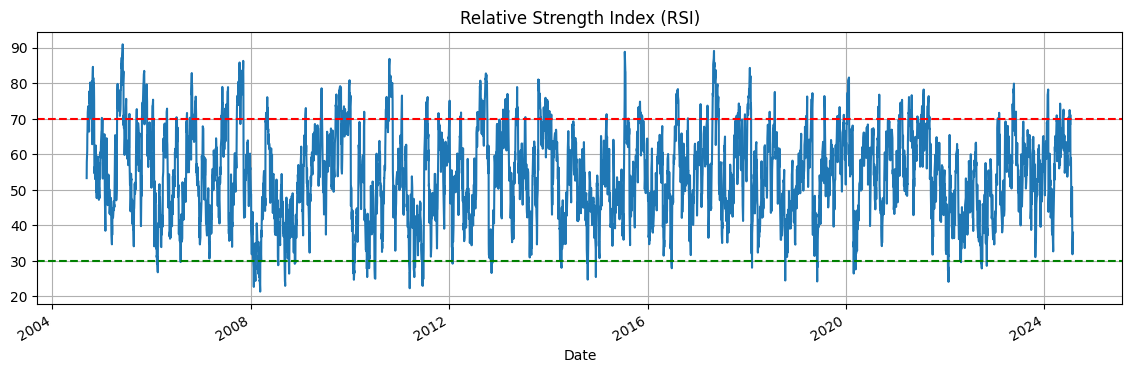

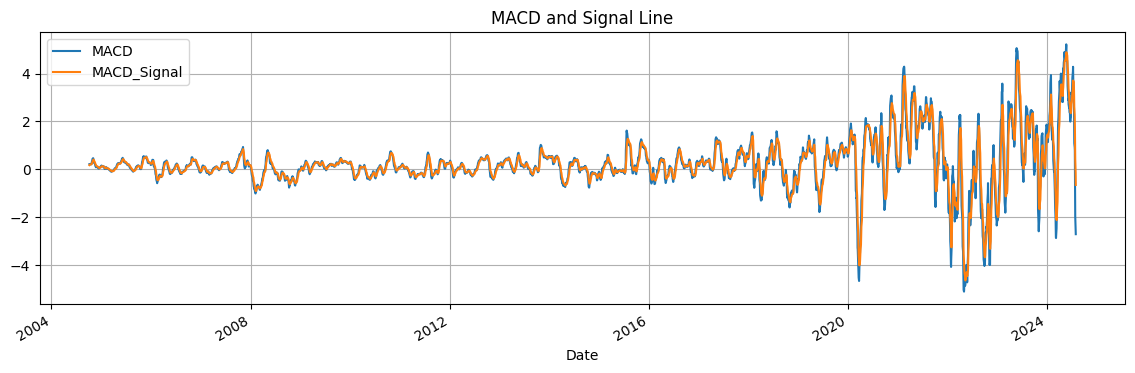

In [39]:
# ===== 1. Load and Prepare Data =====
df = pd.read_csv("../data/yfinance_data/GOOG_historical_data.csv", parse_dates=["Date"], index_col="Date")

# Ensure columns are numeric
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data
df.dropna(inplace=True)

# ===== 2. Apply Technical Indicators with TA-Lib =====
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df["SMA_50"] = talib.SMA(df["Close"], timeperiod=50)
df["RSI"] = talib.RSI(df["Close"], timeperiod=14)

macd, macdsignal, _ = talib.MACD(df["Close"])
df["MACD"] = macd
df["MACD_Signal"] = macdsignal

# ===== 3. (Optional) Use PyNance for Online Comparison =====
# We'll download current AMZN data for a similar time frame
online_df = pn.data.get("GOOG", start=str(df.index.min().date()), end=str(df.index.max().date()))
print("Sample Online Data from PyNance:")
print(online_df.head())

# ===== 4. Visualize the Data =====

# Plot 1: Close Price with SMAs
df[["Close", "SMA_20", "SMA_50"]].plot(figsize=(14, 6), title="AMZN Close Price with 20 & 50 Day SMA")
plt.grid(True)
plt.show()

# Plot 2: RSI
df["RSI"].plot(figsize=(14, 4), title="Relative Strength Index (RSI)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.grid(True)
plt.show()

# Plot 3: MACD
df[["MACD", "MACD_Signal"]].plot(figsize=(14, 4), title="MACD and Signal Line")
plt.grid(True)
plt.show()



Meta stock data


Sample Online Data from PyNance:
               Open     High     Low   Close    Volume
Date                                                  
2024-07-30  467.000  472.730  456.70  463.19  11390439
2024-07-29  469.880  473.960  465.02  465.71  11339630
2024-07-26  464.195  469.770  459.42  465.70  14222388
2024-07-25  463.260  463.548  442.65  453.41  18240489
2024-07-24  472.305  476.300  460.58  461.27  17649738


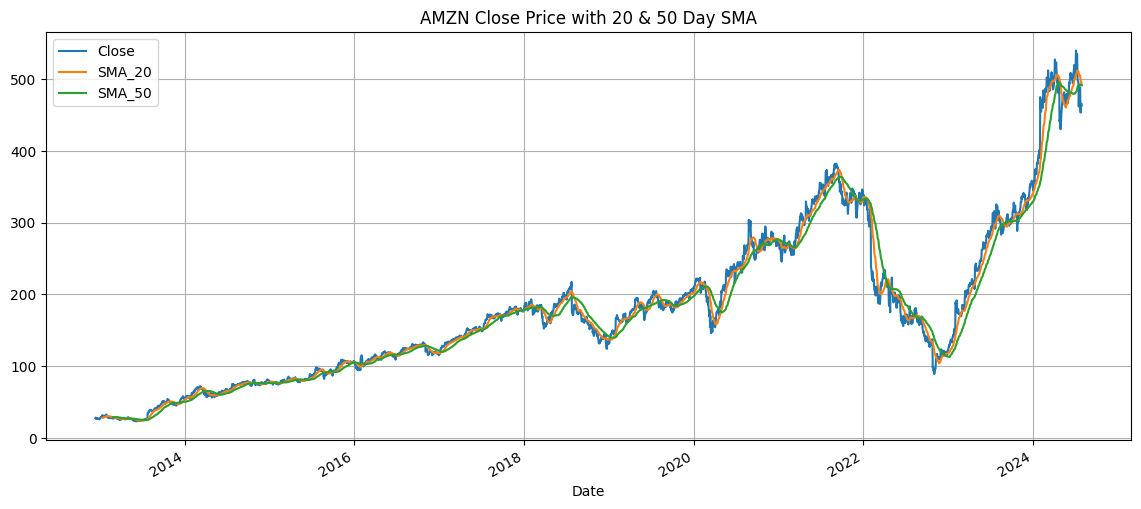

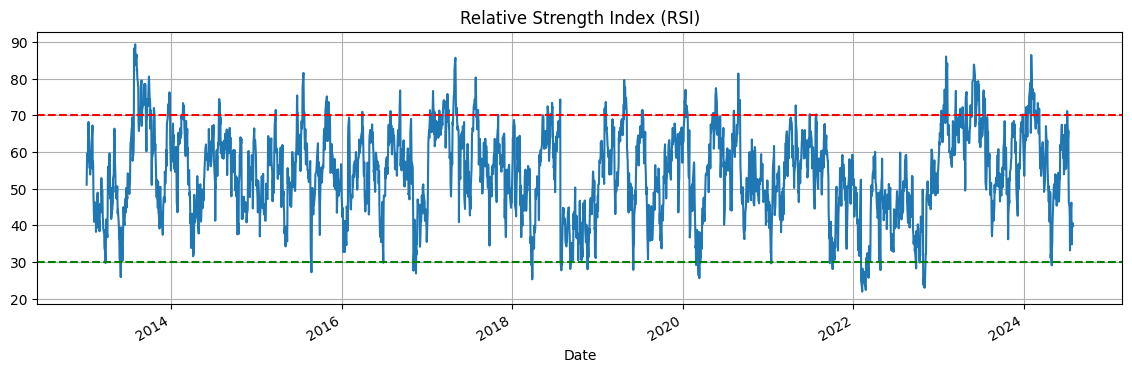

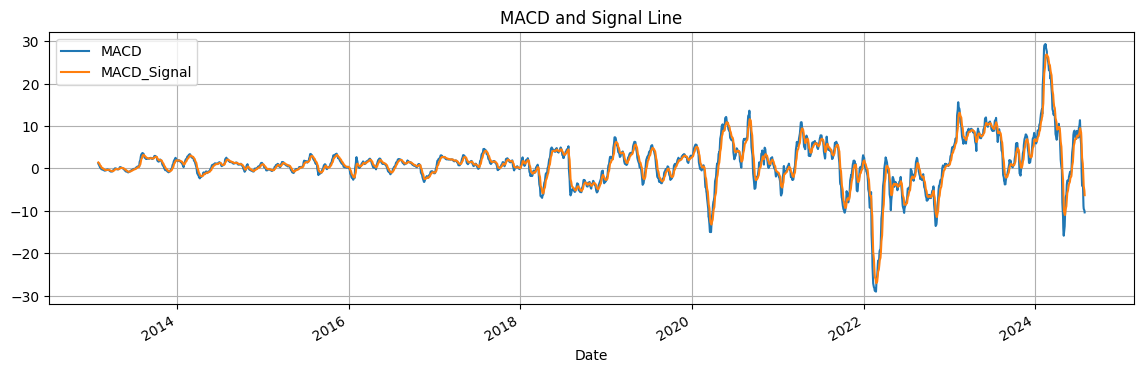

In [40]:
# ===== 1. Load and Prepare Data =====
df = pd.read_csv("../data/yfinance_data/META_historical_data.csv", parse_dates=["Date"], index_col="Date")

# Ensure columns are numeric
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data
df.dropna(inplace=True)

# ===== 2. Apply Technical Indicators with TA-Lib =====
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df["SMA_50"] = talib.SMA(df["Close"], timeperiod=50)
df["RSI"] = talib.RSI(df["Close"], timeperiod=14)

macd, macdsignal, _ = talib.MACD(df["Close"])
df["MACD"] = macd
df["MACD_Signal"] = macdsignal

# ===== 3. (Optional) Use PyNance for Online Comparison =====
# We'll download current AMZN data for a similar time frame
online_df = pn.data.get("META", start=str(df.index.min().date()), end=str(df.index.max().date()))
print("Sample Online Data from PyNance:")
print(online_df.head())

# ===== 4. Visualize the Data =====

# Plot 1: Close Price with SMAs
df[["Close", "SMA_20", "SMA_50"]].plot(figsize=(14, 6), title="AMZN Close Price with 20 & 50 Day SMA")
plt.grid(True)
plt.show()

# Plot 2: RSI
df["RSI"].plot(figsize=(14, 4), title="Relative Strength Index (RSI)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.grid(True)
plt.show()

# Plot 3: MACD
df[["MACD", "MACD_Signal"]].plot(figsize=(14, 4), title="MACD and Signal Line")
plt.grid(True)
plt.show()



MSFT Stock Data Analaysis

Sample Online Data from PyNance:
               Open     High      Low    Close        Volume
Date                                                        
2024-07-30  426.097  427.422  415.777  421.316  3.281204e+07
2024-07-29  429.943  430.510  423.093  425.111  1.518343e+07
2024-07-26  416.614  427.288  415.687  423.657  2.367364e+07
2024-07-25  427.174  428.170  415.926  416.813  3.005781e+07
2024-07-24  438.780  439.806  425.963  427.273  2.690787e+07


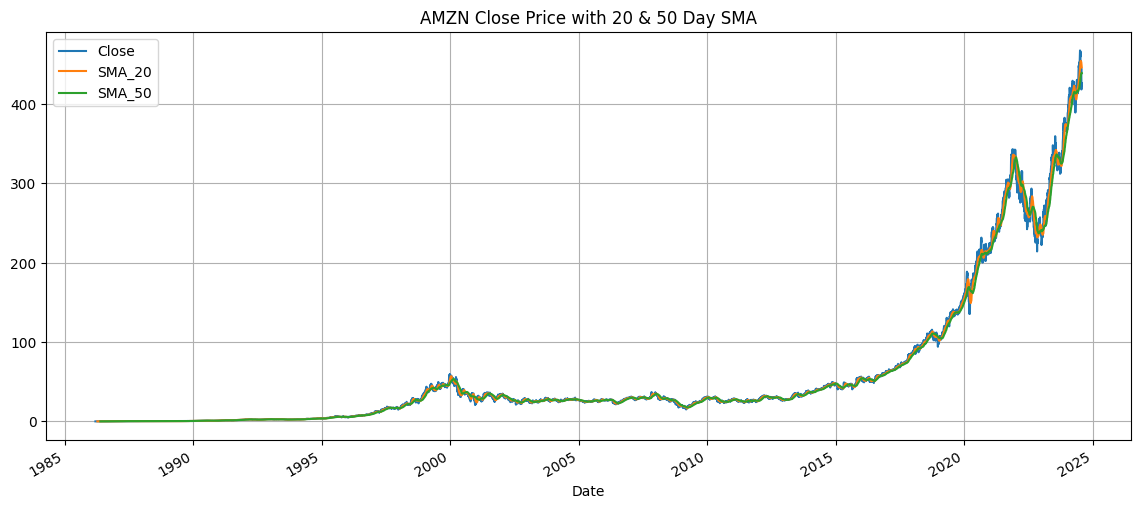

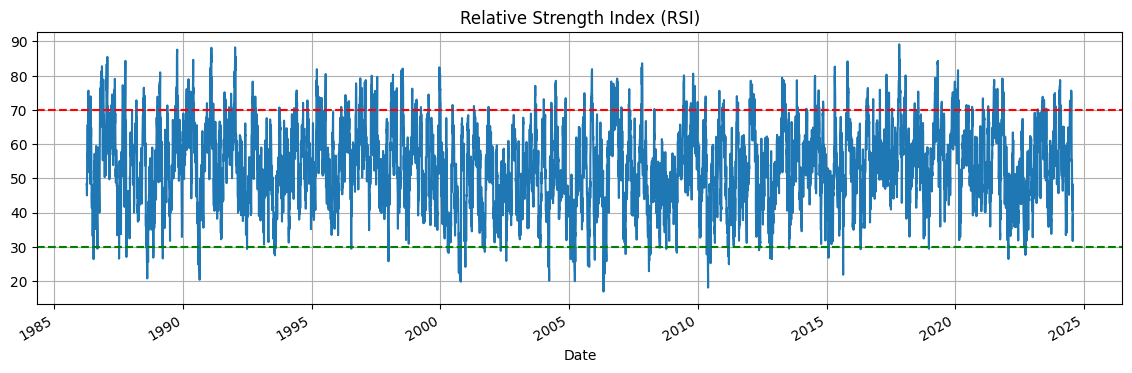

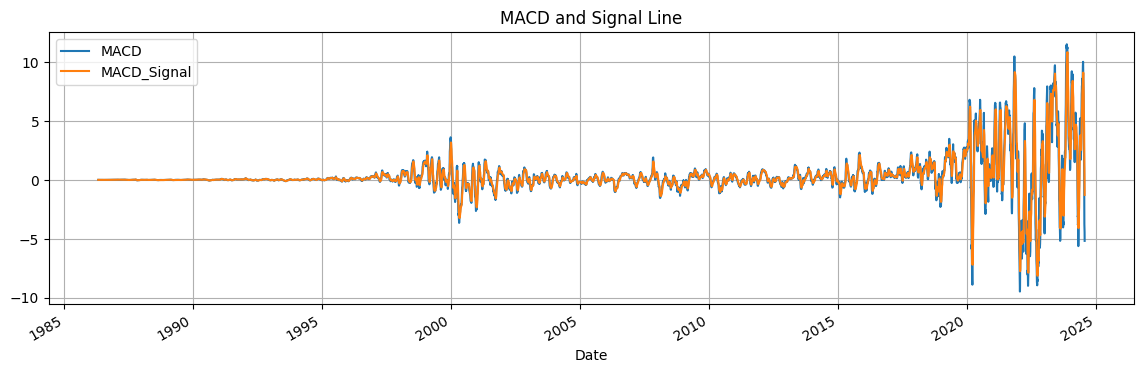

In [41]:
# ===== 1. Load and Prepare Data =====
df = pd.read_csv("../data/yfinance_data/MSFT_historical_data.csv", parse_dates=["Date"], index_col="Date")

# Ensure columns are numeric
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data
df.dropna(inplace=True)

# ===== 2. Apply Technical Indicators with TA-Lib =====
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df["SMA_50"] = talib.SMA(df["Close"], timeperiod=50)
df["RSI"] = talib.RSI(df["Close"], timeperiod=14)

macd, macdsignal, _ = talib.MACD(df["Close"])
df["MACD"] = macd
df["MACD_Signal"] = macdsignal

# ===== 3. (Optional) Use PyNance for Online Comparison =====
# We'll download current AMZN data for a similar time frame
online_df = pn.data.get("MSFT", start=str(df.index.min().date()), end=str(df.index.max().date()))
print("Sample Online Data from PyNance:")
print(online_df.head())

# ===== 4. Visualize the Data =====

# Plot 1: Close Price with SMAs
df[["Close", "SMA_20", "SMA_50"]].plot(figsize=(14, 6), title="AMZN Close Price with 20 & 50 Day SMA")
plt.grid(True)
plt.show()

# Plot 2: RSI
df["RSI"].plot(figsize=(14, 4), title="Relative Strength Index (RSI)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.grid(True)
plt.show()

# Plot 3: MACD
df[["MACD", "MACD_Signal"]].plot(figsize=(14, 4), title="MACD and Signal Line")
plt.grid(True)
plt.show()



NVDA Stock Data analysis

Sample Online Data from PyNance:
               Open     High      Low    Close     Volume
Date                                                     
2024-07-30  111.502  111.972  102.524  103.714  486908466
2024-07-29  113.672  116.262  111.282  111.572  248190395
2024-07-26  116.172  116.182  111.562  113.042  293444389
2024-07-25  113.022  116.612  106.284  112.262  460138077
2024-07-24  119.152  119.932  113.422  114.232  327827510


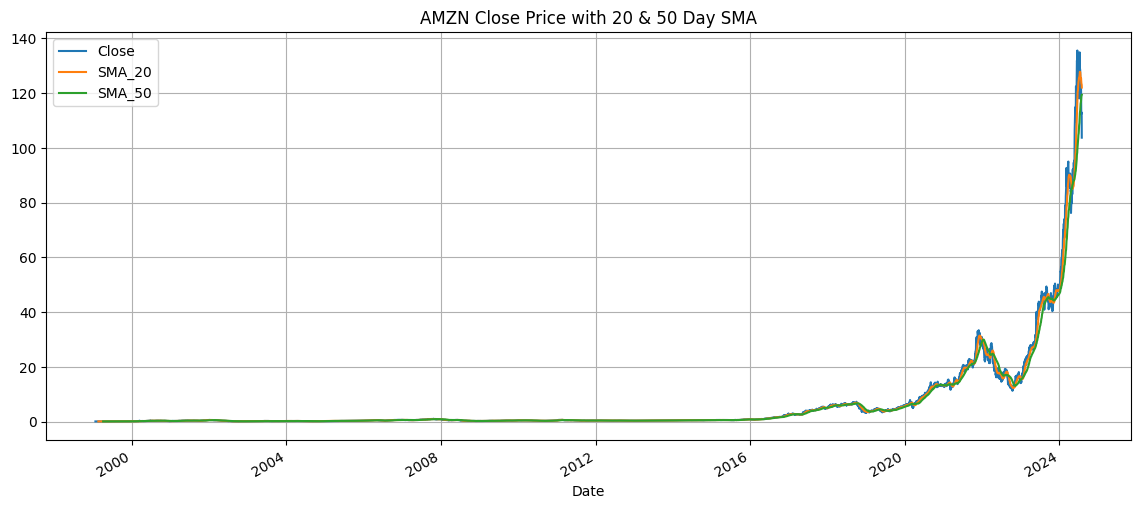

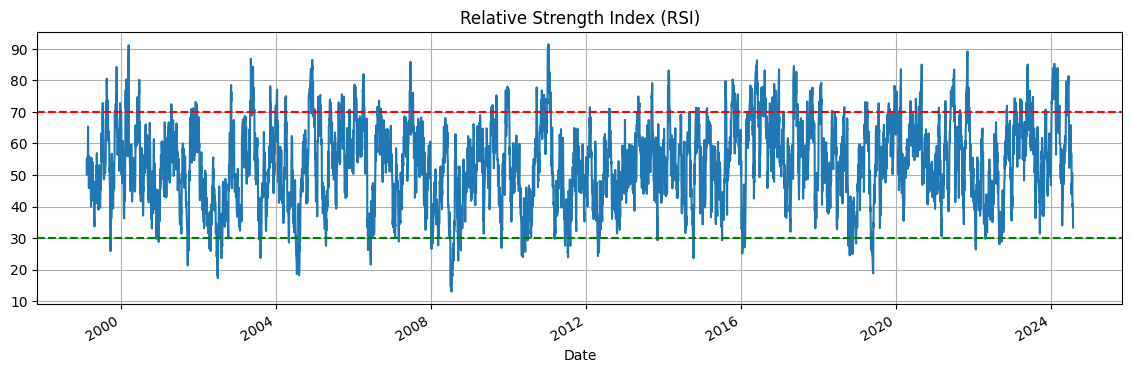

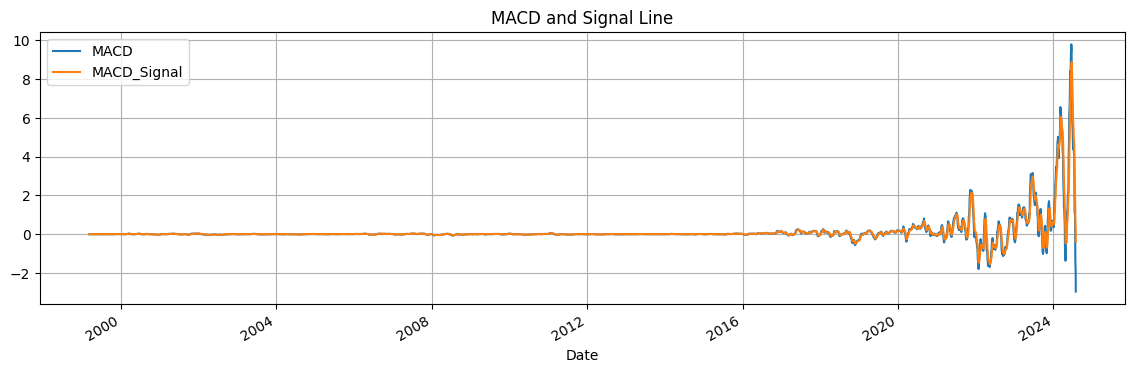

In [42]:
# ===== 1. Load and Prepare Data =====
df = pd.read_csv("../data/yfinance_data/NVDA_historical_data.csv", parse_dates=["Date"], index_col="Date")

# Ensure columns are numeric
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data
df.dropna(inplace=True)

# ===== 2. Apply Technical Indicators with TA-Lib =====
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df["SMA_50"] = talib.SMA(df["Close"], timeperiod=50)
df["RSI"] = talib.RSI(df["Close"], timeperiod=14)

macd, macdsignal, _ = talib.MACD(df["Close"])
df["MACD"] = macd
df["MACD_Signal"] = macdsignal

# ===== 3. (Optional) Use PyNance for Online Comparison =====
# We'll download current AMZN data for a similar time frame
online_df = pn.data.get("NVDA", start=str(df.index.min().date()), end=str(df.index.max().date()))
print("Sample Online Data from PyNance:")
print(online_df.head())

# ===== 4. Visualize the Data =====

# Plot 1: Close Price with SMAs
df[["Close", "SMA_20", "SMA_50"]].plot(figsize=(14, 6), title="AMZN Close Price with 20 & 50 Day SMA")
plt.grid(True)
plt.show()

# Plot 2: RSI
df["RSI"].plot(figsize=(14, 4), title="Relative Strength Index (RSI)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.grid(True)
plt.show()

# Plot 3: MACD
df[["MACD", "MACD_Signal"]].plot(figsize=(14, 4), title="MACD and Signal Line")
plt.grid(True)
plt.show()



TSLA Stock data analysis

In [ ]:
# ===== 1. Load and Prepare Data =====
df = pd.read_csv("../data/yfinance_data/TSLA_historical_data.csv", parse_dates=["Date"], index_col="Date")

# Ensure columns are numeric
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing data
df.dropna(inplace=True)

# ===== 2. Apply Technical Indicators with TA-Lib =====
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df["SMA_50"] = talib.SMA(df["Close"], timeperiod=50)
df["RSI"] = talib.RSI(df["Close"], timeperiod=14)

macd, macdsignal, _ = talib.MACD(df["Close"])
df["MACD"] = macd
df["MACD_Signal"] = macdsignal

# ===== 3. (Optional) Use PyNance for Online Comparison =====
# We'll download current AMZN data for a similar time frame
online_df = pn.data.get("TSLA", start=str(df.index.min().date()), end=str(df.index.max().date()))
print("Sample Online Data from PyNance:")
print(online_df.head())

# ===== 4. Visualize the Data =====

# Plot 1: Close Price with SMAs
df[["Close", "SMA_20", "SMA_50"]].plot(figsize=(14, 6), title="AMZN Close Price with 20 & 50 Day SMA")
plt.grid(True)
plt.show()

# Plot 2: RSI
df["RSI"].plot(figsize=(14, 4), title="Relative Strength Index (RSI)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.grid(True)
plt.show()

# Plot 3: MACD
df[["MACD", "MACD_Signal"]].plot(figsize=(14, 4), title="MACD and Signal Line")
plt.grid(True)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '../data/yfinance_data/TESLA_historical_data.csv'